In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
# import geoplot
import fiona
import json

import math
np.set_printoptions(threshold=np.inf)

from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, learning_curve, KFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
# from prettytable import PrettyTable
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
# from yellowbrick.datasets import load_occupancy
# from yellowbrick.model_selection import FeatureImportances

In [3]:
car_df = pd.read_pickle('car_df.pkl')
credit_df = pd.read_pickle('credit_df.pkl')
loyalty_df = pd.read_pickle('loyalty_df.pkl')
gps_df = pd.read_pickle('gps_df.pkl')
gps_df.shape

(685169, 8)

In [4]:
abila = fiona.open('Geospatial/Abila.shp')

abila_df = pd.DataFrame(list(abila))

abila_df['singles'] = abila_df['geometry'].apply(lambda x: True if len(x['coordinates']) == 1 else False)
abila_df['singles'].value_counts()
abila_geo = abila_df[abila_df['singles'] == False]
abila_geo.drop(columns=['singles'], inplace=True)
abila_geo.columns

abila_json = json.loads(abila_geo.to_json(orient='records'))
abila_gdf = gpd.GeoDataFrame.from_features(abila_json)

# Get the order of the fields in the Fiona Collection; add geometry to the end
columns = list(abila.meta["schema"]["properties"]) + ["geometry"]
# Re-order columns in the correct order
gdf2 = abila_gdf[columns]
print(gdf2.columns)

Index(['TLID', 'FEDIRP', 'FENAME', 'FETYPE', 'FEDIRS', 'FRADDL', 'TOADDL',
       'FRADDR', 'TOADDR', 'geometry'],
      dtype='object')


In [5]:
abila_gdf.head()

,geometry,TLID,FEDIRP,FENAME,FETYPE,FEDIRS,FRADDL,TOADDL,FRADDR,TOADDR
0,"LINESTRING (24.84149 36.07051, 24.84156 36.07042)",184632270,N,Hallanol,Dr,None,NaN,NaN,NaN,NaN
1,"LINESTRING (24.84748 36.04809, 24.84837 36.04807)",184632283,S,Ermou,St,None,NaN,NaN,NaN,NaN
2,"LINESTRING (24.84156 36.07042, 24.84196 36.07072)",184632377,N,Handstil,Pl,None,NaN,NaN,NaN,NaN
3,"LINESTRING (24.84747 36.04913, 24.84742 36.04913)",184633316,None,None,None,None,NaN,NaN,NaN,NaN
4,"LINESTRING (24.84428 36.07631, 24.84436 36.07622)",184633423,N,Pilau,St,None,3699.0,3097.0,NaN,NaN


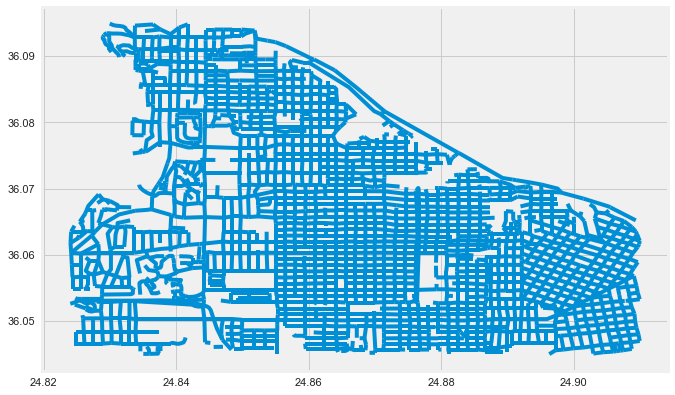

In [6]:
fig, ax = plt.subplots(figsize = (10,10))
abila_gdf.plot(ax=ax)
plt.show()

In [51]:
kronos = fiona.open('Geospatial/Kronos_Island.shp')

kronos_df = pd.DataFrame(list(kronos))

kronos_json = json.loads(kronos_df.to_json(orient='records'))
kronos_gdf = gpd.GeoDataFrame.from_features(kronos_json)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        1 non-null      object
 1   id          1 non-null      object
 2   properties  1 non-null      object
 3   geometry    1 non-null      object
dtypes: object(4)
memory usage: 160.0+ bytes


<AxesSubplot:>

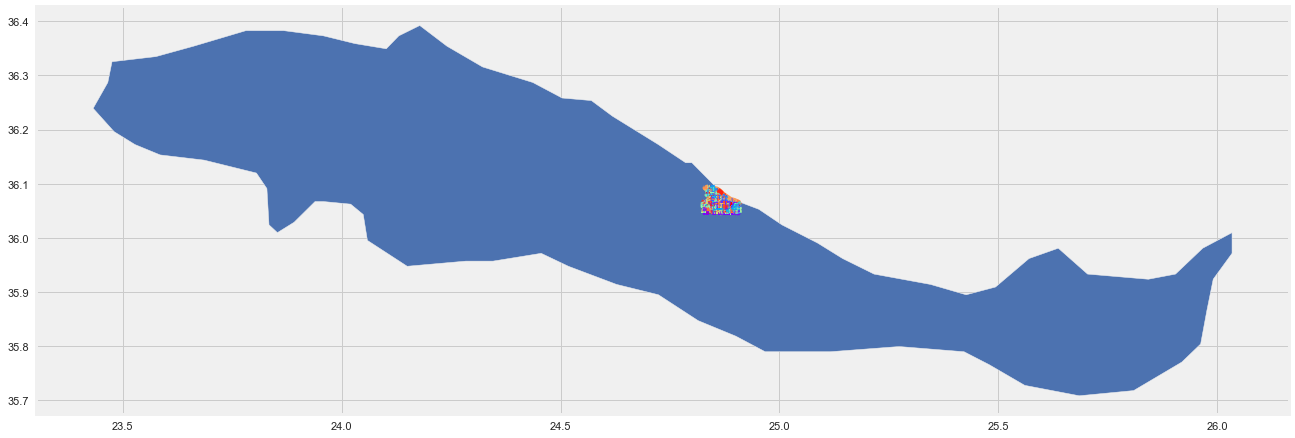

In [94]:
fig, ax = plt.subplots(figsize= (20,20))
abila_gdf.plot(ax=ax, cmap = 'rainbow', column = 'FENAME')
kronos_g.plot(ax=ax)

In [8]:
abila_in_kronos = gpd.overlay(abila_gdf, kronos_g, how = 'intersection')
abila_in_kronos.plot(figsize= (20,15), cmap = 'prism', column = 'FENAME')

NameError: name 'kronos_g' is not defined